# Binary Classification Images with CNN

## Objectives & Overview  

Tthe goal of this project is to build a Convolutional Neural Network (CNN) that is able to classify a series of images into two different classes / tags, that is, to differentiate between the analyzed images if what is shown corresponds to a dog or a cat.

To achieve it, we will build a Convolutional Neural Networks (CNN) model applying TensorFlow and Keras libraries of the Python language. CNN consists on adding a new additional layer (the convolutional layer), which will provide eyes to the deep learning model to identify objects inside images.

## Import Required Packages 

In [1]:
#importing tensorflow and keras libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
tf.__version__

'2.1.0'

In [3]:
#importing numpy for vectors and arrays operations 
import numpy as np
#importing preprocessing package to apply feature scaling
from sklearn.preprocessing import LabelEncoder

#importing packages to work with images
from keras.preprocessing import image
import PIL
from PIL import Image
from IPython.display import Image

## 1 Data Preprocessing 

Before starting to build our model, we need to check the raw data and apply some changes or transformations in order to work with consistent data. 

### 1.1 Preprocessing the training set 

We are going to apply some transformations in the images of the training set in order to avoid "overfitting".

Basically, we are working with the term knowed as **"image augmentation"**, which consists of transforming the images of the training set, so the CNN will not overtrain on the existing images because by applying these transformations we will get new images more consistent.

In order to apply these transformations, we will use the **ImageDataGenerator() class** that will apply the transformations in the images of the training set.

Then, we will use the directory() method of the ImageDataGenerator() class to connect the  Image Augmentation tool to the images of the training set.

In [4]:
#transforming the training set
#creating an object to build the image augmentation tool
train_datagen = ImageDataGenerator(rescale = 1./255, #apply feature scaling or normalization to the pixels
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#connecting the image augmentation tool to the training set directory
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64), #the final size of the images (after training the CNN)
                                                 batch_size = 32, #how many images we want to have in each batch
                                                 class_mode = 'binary') #it could be "binary" or "categorical"

Found 8000 images belonging to 2 classes.


### 1.2 Preprocessing the test set

We have to keep the images of the test set intact by not applying any transformation. 

However, we have to apply scaling because the future predict method of CNN will have to be applied to the same scaling as the one that was applied on the training set.

In [5]:
#creating an image generator object, but without transforming the test set
test_datagen = ImageDataGenerator(rescale = 1./255) #feature scaling or normalization

#connecting the image augmentation tool to the test set directory
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## 2 Building the CNN 

### 2.1. Initialising the CNN 

CNN is a sequence of layers. 

To initialize the CNN, we have to use the Squential() class of the Models module of the Keras library. In addition, it is necessary to build a variable (object) that represents our CNN, which will be named as cnn.

In [6]:
#Initialising the CNN
#Creating the cnn object and use of the Sequential() class
cnn = tf.keras.models.Sequential()

### 2.2. Step 1 - Convolution 

Let's start the convolution using the add method of Keras, which will allow us to include the first layers of the network.

Then, we will apply the Conv2D class of the "layers" module, which is composed of the following parameters:

* **Filters / Kernels**: The number of "feature detectors" taht we want to apply in the images. In this case, we will work with a traiditional architecture, so we choose 32 filters in the first layer and 32 in the second layer.

* **Kernel_size**: The size of the matrix of the "feature detectors". If we choose 3, the matrix will be 3x3.

* **Activation_function**: In general, we will use the "relu" value as our "rectifier activation function", as we are working with the input layer.

* **Input_shape**: Especify the size and shape of the neurons of the input layer. Depending on the dimensions that we are dealing (one, two or three) we have to specify the properly number according to the dimensions of the images (1,2 or3).  

In [7]:
#input layer 
#applying convolution 
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### 2.3. Step 2 - Pooling  

The idea is to recognize an object or characteristic in all the analysed images. So, the neural must have the priority called “spatial invariance”, which means that the neural network does not take into account where the features are, but they should be the most representative to identify shapes and characteristics in the image.

We will use the **MaxPool2D class** of the layers module in order to apply Max Pooling, which is composed of two main parameters:

* **Pool_size**: The size of the matrix that we will use to review the different parts of the Feature Map. We will choose the vale 2 for a 2x2 matrix.

* **Strides**: It is related to the way that we will slide the Feature Map in order to get the maximum of each square. We choose 2 strides, so we will slide the map two by two.

In [8]:
#applying max pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### 2.4. Step 3 - Adding a second convolutional layer  

We are going to add a second convolutional layer in the network.

So, we are going to repeat the same previous steps, but we need to remove the last parameter (input_shape) because it is only used when we are adding the really first layer of the CNN in order to connect automatically the first layer with the input layer. 

In [9]:
#second convolutional layer
#applying convolution and max pooling
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### 2.5. Step 4 - Flattening  

The flattening step consists on flattening the result of all these convolutions and pulling then into one dimensional vector, which will become the input of a future fully connected new network.

In order to achieve it, we will use the **Flatten() class** of the Layers moduel of Keras.

In [10]:
#flattening
cnn.add(tf.keras.layers.Flatten())

### 2.6. Step 5 - Full Connection   

We proceed to add a fully connected layer to the "flatten layer", which is now nothing else that a one dimensional vector that will become the input of a fully connected network.

We will use the **Dense() class** of the layers module of Keras, which is composed of two main paremeters:

* **Units**: Number of hidden neurons that we will have in the fully connected layer. The longer the choosen value, the better th accuracy result.

* **Activation**: Activation Function. We will choose the "relu" function again.

In [11]:
#full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### 2.7. Step 6 - Output Layer   

Finally, we add the last layer of our network (the output layer).

This layer is fully connected to the previous one, so we have to use again the **Dense() class**. However, we need to change the values of the paremeters as follow:

* **Units**: As we are working with binary classification, we will use only one neuron in the ouput layer.

* **Activation**: It is not recommended to use the rectifier activation function in the output layer. Here we have two options:
    * Sigmoid Function for binary classification.
    
    * Softmax Function for multiclass classification.

In [12]:
#output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## 3 Training the CNN 

### 3.1. Compiling the CNN

This phase consists on creating an artificial brain with eyes that should be able to see objects inside images.

So, we need to declare an **optimizer function** ("adam" in our case) that will update the weights to reduce the loss error between the predictions and the target; the **loss function** ("binary_crossentropy" as we are performing binary classification) and the **metrics** ("accuracy") that will review the performance of our CNN.

In [13]:
#compiling the cnn
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### 3.2. Training the CNN

Now, let's train the artificial brain that we created in the previous sections so that it is smarter and can recognize what is in the pictures. 

Then, we will evaluate the mode with the test set throught the epochs, which will review the performance of the model in the test set. In our model we will choose a total of 25 epochs (for example, 10 epoch are very little and 50 epochs are too mcuh, so we select a midpoint of 25).

In addition, unlike other machine learning applications, in computer vision we train the CNN on the Training set and evaluate it on the Test set.

In [14]:
#training the cnn and validating the test data 
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 63 steps
Epoch 1/25
250/250 [==============================] - 152s 610ms/step - loss: 0.6701 - accuracy: 0.5879 - val_loss: 0.6318 - val_accuracy: 0.6460
Epoch 2/25
250/250 [==============================] - 70s 281ms/step - loss: 0.6263 - accuracy: 0.6551 - val_loss: 0.6458 - val_accuracy: 0.6485
Epoch 3/25
250/250 [==============================] - 64s 256ms/step - loss: 0.5887 - accuracy: 0.6961 - val_loss: 0.5669 - val_accuracy: 0.7220
Epoch 4/25
250/250 [==============================] - 64s 256ms/step - loss: 0.5492 - accuracy: 0.7188 - val_loss: 0.5383 - val_accuracy: 0.7395
Epoch 5/25
250/250 [==============================] - 69s 276ms/step - loss: 0.5241 - accuracy: 0.7345 - val_loss: 0.6221 - val_accuracy: 0.7115
Epoch 6/25
250/250 [==============================] - 68s 273ms/step - loss: 0.5001 - accuracy: 0.7570 - val_loss: 0.4951 - val_accuracy: 0.7645
Epoch 7/25
250/250 [================

## 4 Making a single prediction 

We are going to deploy our CNN in production and test its performance on a single observation of three images about dogs and cats, which are not included both in the training set and test set.

**A) First Prediction**

Take one of the images reserved for the final prediction, in order to see if our network can correctly classify the images or not.

In [20]:
#first test prediction
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction1 = 'dog'
else:
  prediction1 = 'cat'

In [21]:
print(prediction1)

dog


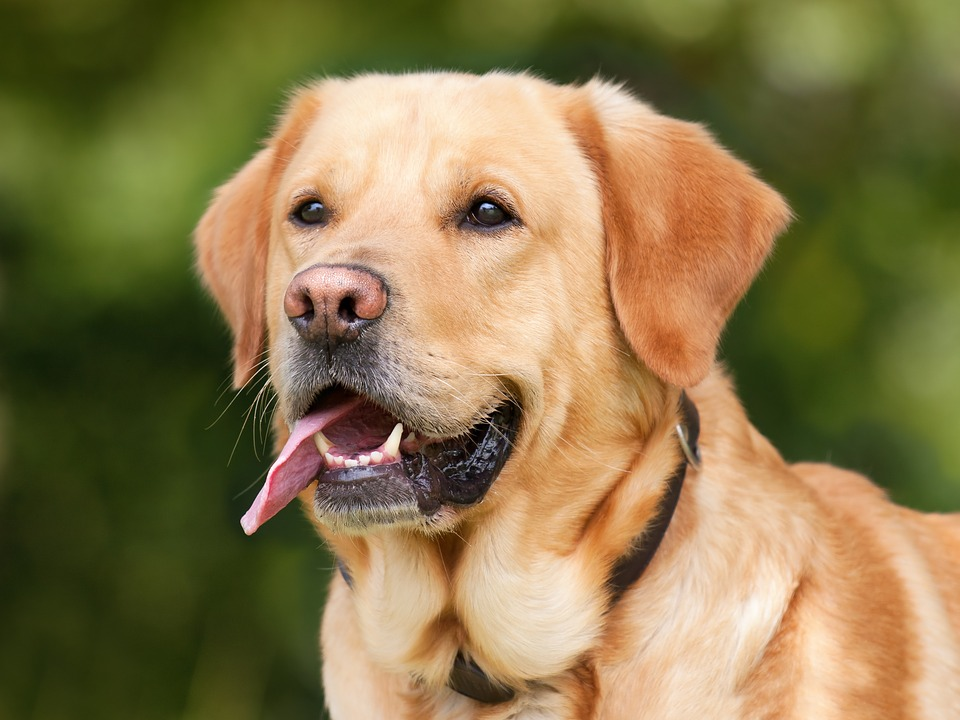

In [42]:
#displaying the image
Image("dataset/single_prediction/cat_or_dog_1.jpg")

Final Result: we verify that our cnn could classify correctly the analyzed image as a dog.

**B) Second Prediction**

Let's take the other image reserved for the final prediction, in order to see if our network can correctly classify the images or not.

In [44]:
#second test prediction
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction2 = 'dog'
else:
  prediction2 = 'cat'

In [46]:
print(prediction2)

cat


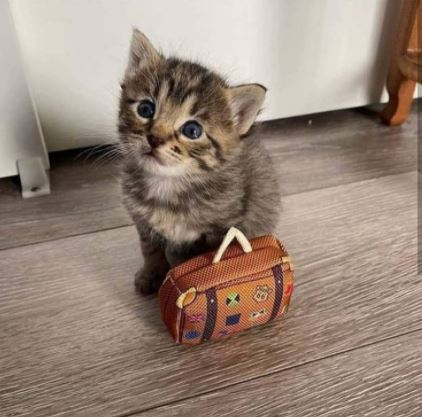

In [43]:
#displaying the image
Image("dataset/single_prediction/cat_or_dog_2.jpg")

Final Result: we verify that our cnn could classify correctly the analyzed image as a cat.

**C) Random Prediction**

Finally, we will check how our cnn behaves when it has to evaluate new images, which are different from the ones available in the training and test set. 

For that, we took a random image from Google (test.jpg) and inserted it in the single_prediction folder of the dataset to make the prediction.

In [36]:
#third test prediction
#take a random image from google 
test_image = image.load_img('dataset/single_prediction/test.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction3 = 'dog'
else:
  prediction3 = 'cat'

In [37]:
print(prediction3)

cat


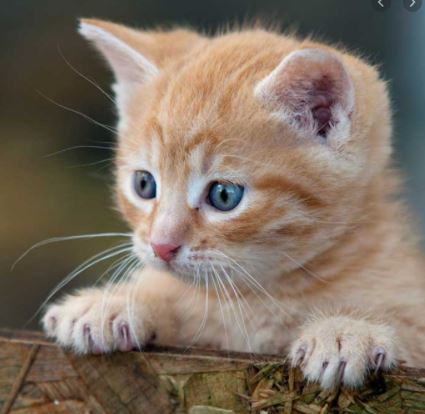

In [40]:
#displaying the image
Image("dataset/single_prediction/test.jpg")

Final Result: as in the previous samples, we verify that our cnn could classify correctly the analyzed random image selected from Google as a cat.